#### Task # 01 ----- Concatinating all files in 1 dataframe


In [1]:
import pandas as pd
import os


In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Sales_Data\Sales_April_2019.csv")
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"
18382,194094,Lightning Charging Cable,1,14.95,04/18/19 11:08,"354 North St, Boston, MA 02215"


In [3]:

files = [file for file in os.listdir(r"C:\Users\Lenovo\OneDrive\Desktop\Sales_Data")]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data , df])
    
    
all_months_data.tail()                     
all_months_data.to_csv("all_data.csv" , index=False)    
    

#### Read in updated dataframe

In [4]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Data Cleaning

In [5]:
all_data = all_data.dropna()
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### Task # 02 ----- Add month as new column and change type to int32

In [6]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [16]:

all_data['Month'].astype("int32")

0         4
2         4
3         4
4         4
5         4
         ..
186845    9
186846    9
186847    9
186848    9
186849    9
Name: Month, Length: 185950, dtype: int32

In [15]:
all_data = all_data[all_data["Month"] != "Or"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### Changing types of columns

In [31]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
pd.options.mode.chained_assignment = None 

In [32]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas ( TX 75001),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston ( MA 02215),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles ( CA 90001),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA 90001),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA 90001),9,27


In [33]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  object        
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
 9   Hour              185950 non-null  int64         
 10  Minute            185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 17.0+ MB


#### Add a Sales column

In [34]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas ( TX 75001),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston ( MA 02215),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles ( CA 90001),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA 90001),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA 90001),9,27


#### Add a new column "City"

In [35]:
all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{x.split(',')[1]} ({x.split(',')[2]})")


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas ( TX 75001),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston ( MA 02215),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles ( CA 90001),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA 90001),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA 90001),9,27


#### What was the best month for sales and how much was earned in that month?

In [36]:
all_data[["Month" ,"Sales"]].max()

Month        12
Sales    3400.0
dtype: object

In [37]:
results = all_data.groupby("Month").sum()

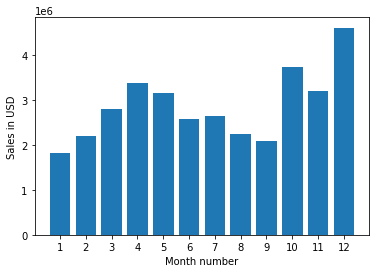

In [38]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months , results["Sales"])

plt.xticks(months)
plt.ylabel("Sales in USD")
plt.xlabel("Month number")
plt.show()

#### Which city has the highest number of sales?

In [39]:
highest_sales = all_data.groupby("City").sum()
print(highest_sales)

                            Quantity Ordered    Price Each         Sales  \
City                                                                       
 Atlanta ( GA 30301)                   16602  2.779908e+06  2.795499e+06   
 Austin ( TX 73301)                    11153  1.809874e+06  1.819582e+06   
 Boston ( MA 02215)                    22528  3.637410e+06  3.661642e+06   
 Dallas ( TX 75001)                    16730  2.752628e+06  2.767975e+06   
 Los Angeles ( CA 90001)               33289  5.421435e+06  5.452571e+06   
 New York City ( NY 10001)             27932  4.635371e+06  4.664317e+06   
 Portland ( ME 04101)                   2750  4.471893e+05  4.497583e+05   
 Portland ( OR 97035)                  11303  1.860558e+06  1.870732e+06   
 San Francisco ( CA 94016)             50239  8.211462e+06  8.262204e+06   
 Seattle ( WA 98101)                   16553  2.733296e+06  2.747755e+06   

                              Hour   Minute  
City                                     

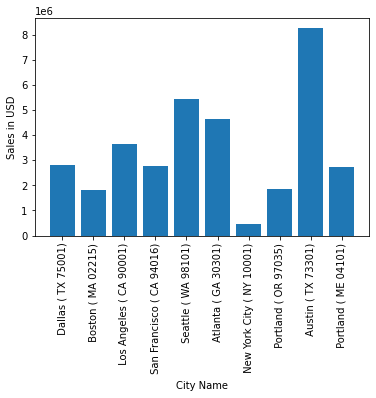

In [40]:
import matplotlib.pyplot as plt
cities = all_data["City"].unique()
plt.bar(cities , highest_sales["Sales"])

plt.xticks(cities , rotation = 'vertical' , size ='10')
plt.ylabel("Sales in USD")
plt.xlabel("City Name")
plt.show()

#### What time we should advertise the most to increase the likelihood of purchase?

In [41]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas ( TX 75001),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston ( MA 02215),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles ( CA 90001),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA 90001),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA 90001),9,27


In [42]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

In [44]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas ( TX 75001),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston ( MA 02215),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles ( CA 90001),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA 90001),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA 90001),9,27


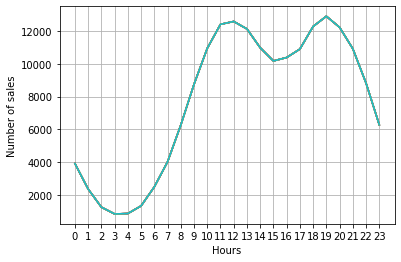

In [51]:
hours = [hour for hour, df in all_data.groupby("Hour")]
plt.plot(hours , all_data.groupby("Hour").count())
plt.xticks(hours)
plt.grid()
plt.xlabel("Hours")
plt.ylabel("Number of sales")
plt.show()

In [ ]:
# My recommendations to put advertisement is at 11.00-12.00 and then 19.00

#### What products are often sold together?

In [60]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]

df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ',' .join(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles ( CA 90001),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA 90001),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles ( CA 90001),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles ( CA 90001),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston ( MA 02215),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [62]:
df = df[["Order ID" , "Grouped"]].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [69]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list , 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Which product was sold the most? Why do you think so?

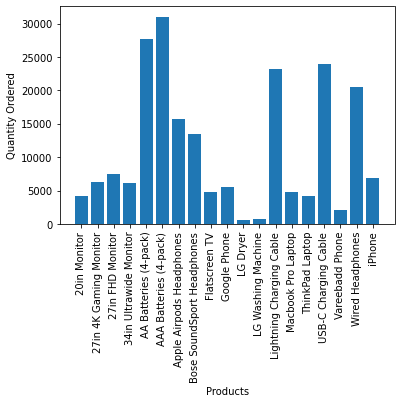

In [80]:
product_group  = all_data.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]
products = [product for product , df in product_group]
plt.xlabel("Products")
plt.ylabel("Quantity Ordered")
plt.bar(products , quantity_ordered)
plt.xticks(products , rotation = 'vertical')
plt.show()

In [81]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas ( TX 75001),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston ( MA 02215),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles ( CA 90001),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA 90001),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA 90001),9,27


<ipython-input-97-46912d807245>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products , rotation = 'vertical')


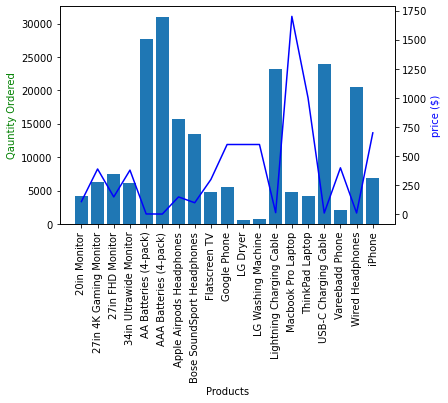

In [97]:
import seaborn as sns
price = all_data.groupby("Product").mean()['Price Each']
fig , ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products , quantity_ordered)
ax2.plot(products , price , 'b-')
ax1.set_xlabel("Products")
ax1.set_ylabel("Qauntity Ordered" , color = 'g')
ax2.set_ylabel("price ($)" , color = 'b')
ax1.set_xticklabels(products , rotation = 'vertical')
plt.show()
